<h1 style="text-align:center;"> Image Classification (binary) Project V3</h1>

<h2> Problem Statement: </h2><br>
<i>The idea of the project is to develop a model that can effectively classify various objects plying on the roads. We aspire to develop a model which can detect the image distance and return a value in miles</i>


------------------------------------------------------------------------------------------------------------------------------

<h6>Import the required libraries</h6>

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

Libraries used:<br><ul><li>Keras 2.3.1</li><li>TensorFlow 1.13.2</li></ul>


------------------------------------------------------------------------------------------------------------------------------

<h6>Build and compile a classifier</h6>

In [4]:

classifier = Sequential()
classifier.add(Conv2D(64, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))


classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


------------------------------------------------------------------------------------------------------------------------------

<h6>Preprocessing of images using ImageDataGenerator</h6>

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Train', # relative path from working directoy
                                                 target_size = (128, 128),
                                                 batch_size = 46, class_mode = 'binary')

Found 46 images belonging to 2 classes.


In [13]:
  valid_set = test_datagen.flow_from_directory('Test',  # relative path from working directoy
                                             target_size = (128, 128), 
                                             batch_size = 32, class_mode = 'binary')

Found 32 images belonging to 2 classes.


------------------------------------------------------------------------------------------------------------------------------

In [15]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 7,
                         epochs = 5,
                         validation_data = valid_set,
                         validation_steps = 5)

Epoch 1/5
7/7 [==============================] - 77s 11s/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 1.9465 - val_accuracy: 0.6250
Epoch 2/5
7/7 [==============================] - 71s 10s/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 1.5432 - val_accuracy: 0.6875
Epoch 3/5
7/7 [==============================] - 70s 10s/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.6625 - val_accuracy: 0.7188
Epoch 4/5
7/7 [==============================] - 68s 10s/step - loss: 0.0046 - accuracy: 0.9969 - val_loss: 1.2926 - val_accuracy: 0.7500
Epoch 5/5
7/7 [==============================] - 70s 10s/step - loss: 0.0385 - accuracy: 0.9814 - val_loss: 1.8234 - val_accuracy: 0.6250


<h6>predictions</h6>

In [20]:

prediction_set = test_datagen.flow_from_directory('Prediction', # relative path from working directoy
                                            target_size = (128, 128),batch_size=1,
                                           class_mode = 'binary')

Found 14 images belonging to 1 classes.


In [21]:
predictions=classifier.predict(prediction_set)

In [22]:
predictions

array([[1.4633106e-04],
       [3.7299097e-02],
       [9.8849618e-01],
       [9.9887186e-01],
       [6.5829672e-02],
       [1.3946288e-03],
       [1.1522654e-06],
       [9.6643037e-01],
       [0.0000000e+00],
       [1.5016522e-01],
       [9.9642974e-01],
       [9.9890566e-01],
       [0.0000000e+00],
       [9.4311762e-01]], dtype=float32)

In [23]:
i=np.random.choice(len(predictions))

This image is predicted as Cyclist


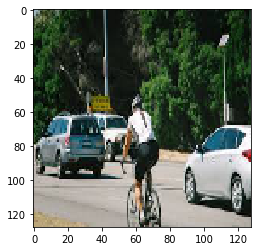

In [24]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","Pedestrian" if predictions[i] > 0.5 else "Cyclist")

In [27]:
i=np.random.choice(len(predictions))

This image is predicted as Pedestrian


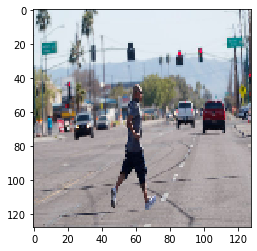

In [26]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","Pedestrian" if predictions[i] > 0.5 else "Cyclist")

In [28]:
i=np.random.choice(len(predictions))

This image is predicted as Cyclist


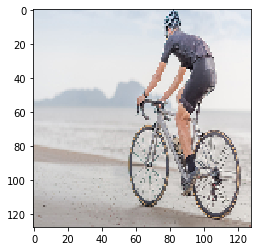

In [29]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","Pedestrian" if predictions[i] > 0.5 else "Cyclist")

In [30]:
i=np.random.choice(len(predictions))

This image is predicted as Cyclist


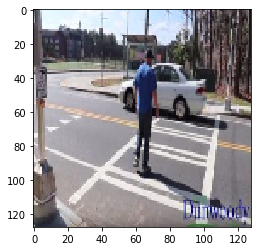

In [31]:
plt.imshow(prediction_set[i][0][0])
print("This image is predicted as","Pedestrian" if predictions[i] > 0.5 else "Cyclist")